In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
file_path = "transjakarta.csv"
df = pd.read_csv(file_path)

In [3]:
data = pd.read_csv('transjakarta.csv')
data.head()

,Koridor,Bulan,Jumlah_Pelanggan
0,BLOK M - KOTA,JANUARI,1704217
1,BLOK M - KOTA,FEBRUARI,1512363
2,BLOK M - KOTA,MARET,1492519
3,BLOK M - KOTA,APRIL,1408369
4,BLOK M - KOTA,MEI,1736596


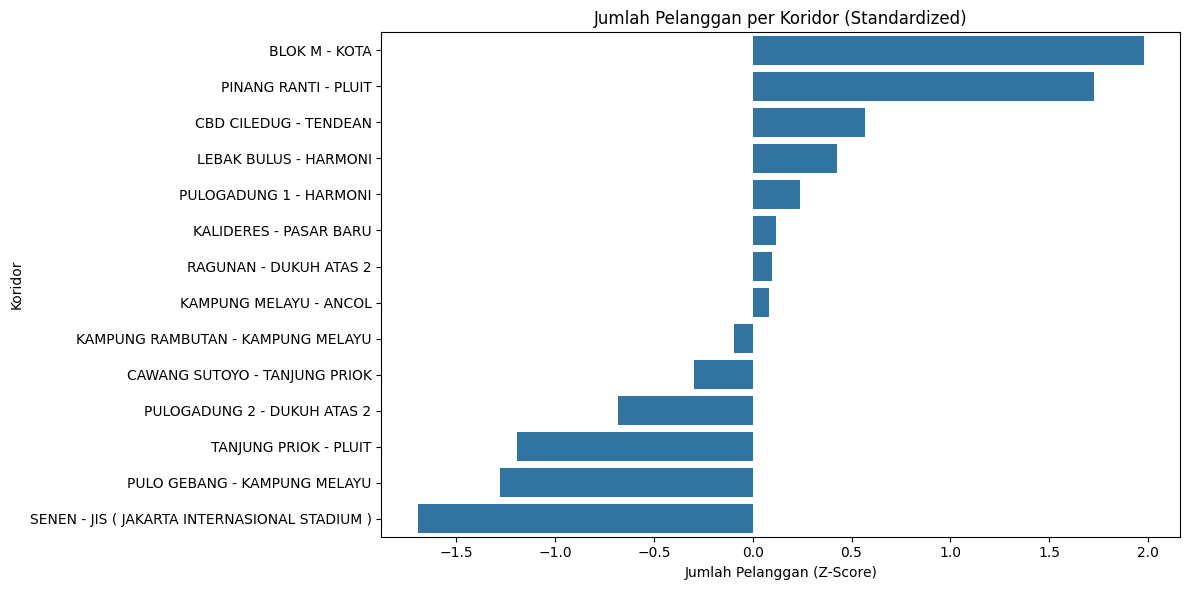

In [4]:
# from sklearn.preprocessing import normalize
# data_scaled = normalize(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca data
df = pd.read_csv("transjakarta.csv")  # ganti dengan path file kamu jika perlu

# 2. Total pelanggan per koridor (akumulasi dari semua bulan)
df_total = df.groupby('Koridor')['Jumlah_Pelanggan'].sum().reset_index()

# 3. Standarisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_total[['Jumlah_Pelanggan']])

# 4. Simpan hasil standarisasi ke DataFrame baru
df_total['Jumlah_Pelanggan_Std'] = scaled_data

# 5. Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Jumlah_Pelanggan_Std', y='Koridor', data=df_total.sort_values('Jumlah_Pelanggan_Std', ascending=False))
plt.title('Jumlah Pelanggan per Koridor (Standardized)')
plt.xlabel('Jumlah Pelanggan (Z-Score)')
plt.ylabel('Koridor')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from scipy.stats import zscore

# Ganti path ini ke file CSV kamu
df = pd.read_csv("transjakarta.csv")

# Misalnya nama kolom jumlah pelanggan itu 'Jumlah Pelanggan'
# Hitung Z-Score
df['Z-Score'] = zscore(df['Jumlah_Pelanggan'])

# Tampilkan hasilnya
print(df[['Koridor', 'Jumlah_Pelanggan', 'Z-Score']])

                                           Koridor  Jumlah_Pelanggan   Z-Score
0                                    BLOK M - KOTA           1704217  1.863298
1                                    BLOK M - KOTA           1512363  1.456233
2                                    BLOK M - KOTA           1492519  1.414129
3                                    BLOK M - KOTA           1408369  1.235584
4                                    BLOK M - KOTA           1736596  1.931998
..                                             ...               ...       ...
163  SENEN - JIS ( JAKARTA INTERNASIONAL STADIUM )             49017 -1.648616
164  SENEN - JIS ( JAKARTA INTERNASIONAL STADIUM )             50512 -1.645444
165  SENEN - JIS ( JAKARTA INTERNASIONAL STADIUM )             57202 -1.631250
166  SENEN - JIS ( JAKARTA INTERNASIONAL STADIUM )             57217 -1.631218
167  SENEN - JIS ( JAKARTA INTERNASIONAL STADIUM )             65373 -1.613913

[168 rows x 3 columns]


In [6]:
silhouette_scores = []
cluster_range = range(2, 11) #coba dulu dari 2 sampai 9

In [7]:
for n_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)

In [8]:
optimal_clusters = cluster_range[np.argmax(silhouette_scores)] #nah ini nentuin cluster dgn skor tertinggi

In [9]:
clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
clusters = clustering.fit_predict(scaled_data) #ini proses clustering dgn jumlah cluster yg optimal tdi
df_total['Cluster'] = clusters

In [10]:
print(df_total[['Koridor', 'Jumlah_Pelanggan', 'Cluster']]) 

                                          Koridor  Jumlah_Pelanggan  Cluster
0                                   BLOK M - KOTA          20861793        2
1                   CAWANG SUTOYO - TANJUNG PRIOK           8261792        1
2                           CBD CILEDUG - TENDEAN          13067673        1
3                          KALIDERES - PASAR BARU          10570644        1
4                          KAMPUNG MELAYU - ANCOL          10355845        1
5               KAMPUNG RAMBUTAN - KAMPUNG MELAYU           9399044        1
6                           LEBAK BULUS - HARMONI          12285028        1
7                            PINANG RANTI - PLUIT          19480944        2
8                    PULO GEBANG - KAMPUNG MELAYU           2834924        0
9                          PULOGADUNG 1 - HARMONI          11222022        1
10                    PULOGADUNG 2 - DUKUH ATAS 2           6146351        0
11                         RAGUNAN - DUKUH ATAS 2          10449294        1

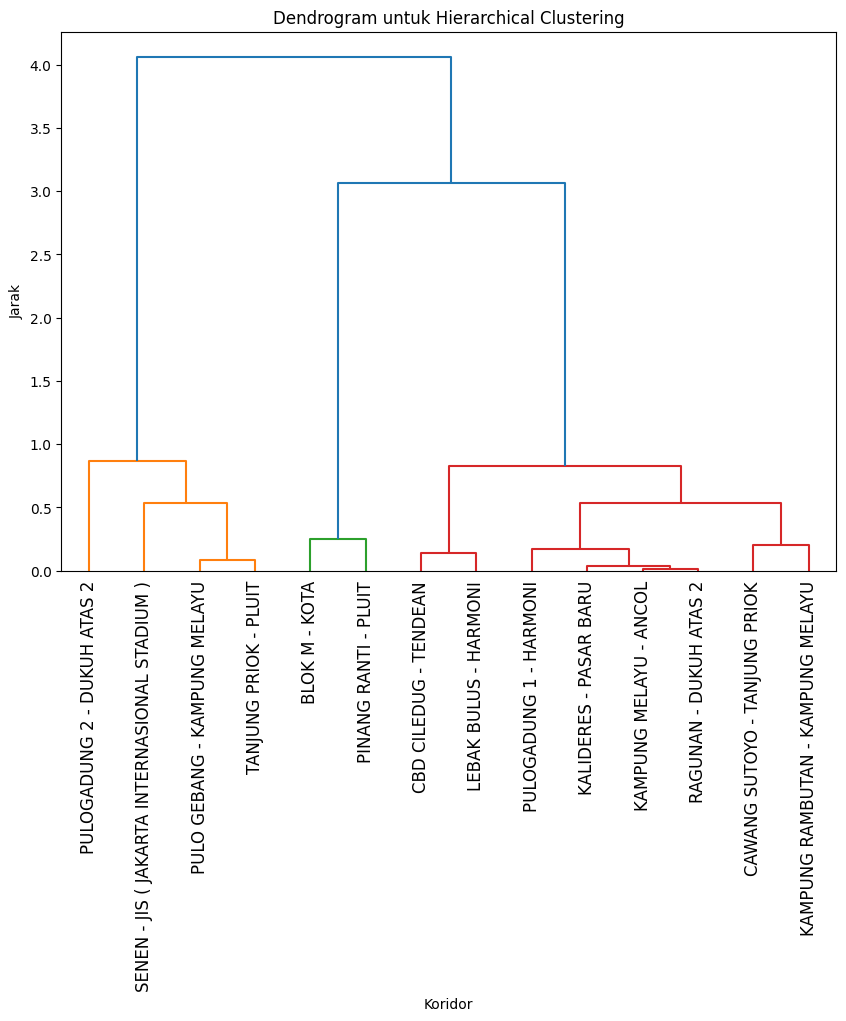

In [11]:
Z = sch.linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, labels=df_total['Koridor'].values)
plt.title('Dendrogram untuk Hierarchical Clustering')
plt.xlabel('Koridor')
plt.ylabel('Jarak')
plt.xticks(rotation=90)
plt.show() #dendogram

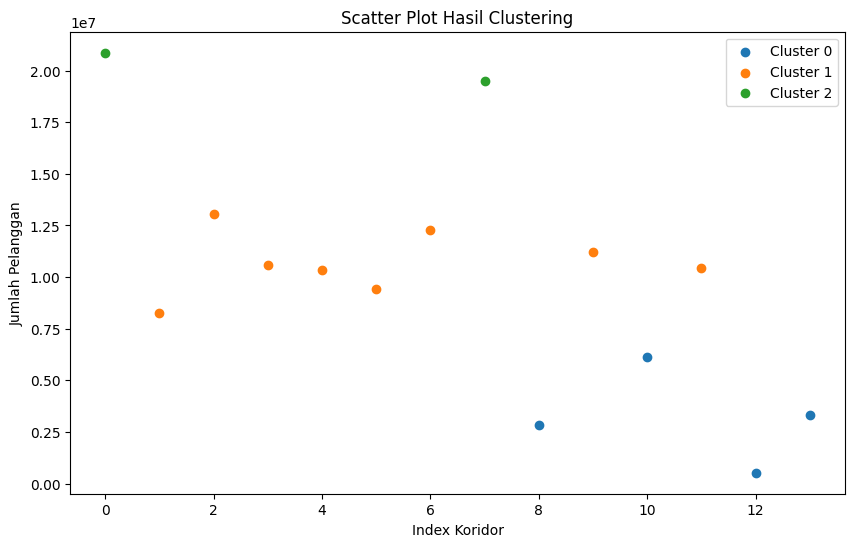

In [12]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        df_total[df_total['Cluster'] == cluster].index, 
        df_total[df_total['Cluster'] == cluster]['Jumlah_Pelanggan'], 
        label=f'Cluster {cluster}'
    )

plt.title('Scatter Plot Hasil Clustering')
plt.xlabel('Index Koridor')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show() #scatter plot

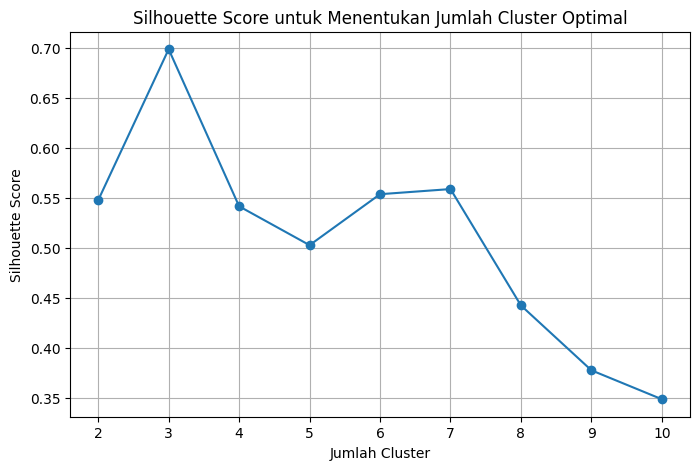

In [13]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()